In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Let's create a classification dataset
from sklearn.datasets import make_circles

# Set n_samples to 1000
n_samples = 1000

# Features and Labels
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [3]:
# Let's visualize our data
X, y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64))

In [4]:
# Let's split our data into training and testing set
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train, X_test

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.64889467, -0.51222194],
        [-0.18878747,  0.74504113],
        [-0.27333143, -0.70507331]]),
 array([[ 6.19725230e-01,  5.06557203e-01],
        [ 6.47077518e-01, -3.64208423e-01],
        [ 4.18714630e-01,  6.84282939e-01],
        [-6.56306805e-01, -4.35764494e-01],
        [ 4.73864310e-01,  8.21235342e-01],
        [-9.85049067e-01,  1.18959505e-01],
        [-6.67864722e-01,  4.81669594e-01],
        [-4.13239724e-01,  9.27643150e-01],
        [ 7.64005728e-01,  1.88843685e-01],
        [ 8.88928919e-01,  4.32518065e-01],
        [ 7.26291194e-01,  3.66873841e-01],
        [-4.70197299e-01,  7.87493733e-01],
        [-3.02040508e-01,  7.44972146e-01],
        [ 1.43882577e-01, -8.22794070e-01],
        [-1.65980756e-01, -7.68488677e-01],
        [-2.74275495e-01, -7.41031770e-01],
        [ 5.97240716e-01, -5.66165658e-01],
        [-8.03313695e

In [5]:
len(X_train), len(X_test)

(800, 200)

In [6]:
# Let's build a model

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

# 3. Fit the model
history = model.fit(X_train, y_train, epochs=255, verbose=1)

Epoch 1/255
25/25 [==============================] - 0s 867us/step - loss: 0.6975 - accuracy: 0.4650
Epoch 2/255
25/25 [==============================] - 0s 833us/step - loss: 0.6928 - accuracy: 0.5175
Epoch 3/255
25/25 [==============================] - 0s 804us/step - loss: 0.6891 - accuracy: 0.6162
Epoch 4/255
25/25 [==============================] - 0s 756us/step - loss: 0.6834 - accuracy: 0.6875
Epoch 5/255
25/25 [==============================] - 0s 667us/step - loss: 0.6750 - accuracy: 0.7038
Epoch 6/255
25/25 [==============================] - 0s 707us/step - loss: 0.6576 - accuracy: 0.8163
Epoch 7/255
25/25 [==============================] - 0s 708us/step - loss: 0.6377 - accuracy: 0.8388
Epoch 8/255
25/25 [==============================] - 0s 708us/step - loss: 0.6208 - accuracy: 0.7887
Epoch 9/255
25/25 [==============================] - 0s 678us/step - loss: 0.5908 - accuracy: 0.8350
Epoch 10/255
25/25 [==============================] - 0s 667us/step - loss: 0.5637 - accura

In [7]:
# Let's evaluate our model on test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 833us/step - loss: 0.0756 - accuracy: 0.9700
Model loss on test set: 0.0755653977394104
Model accuracy on the test set: 97.00%


You might have seen we have been using variable history when calling the fit() function on a model .
(fit() returns a history object)

In [8]:
# You can access the information in the history variable using the .history attribute
pd.DataFrame(history.history)

,loss,accuracy
0,0.697510,0.46500
1,0.692839,0.51750
2,0.689056,0.61625
3,0.683410,0.68750
4,0.675035,0.70375
...,...,...
250,0.049659,0.97625
251,0.048157,0.98000
252,0.045842,0.98250
253,0.050813,0.97750


Inspecting the outputs, we can see the loss values going down and the accuracy going up.

How does it look(visualize, visualize, visualize) ?

Text(0.5, 1.0, 'Model training curves')

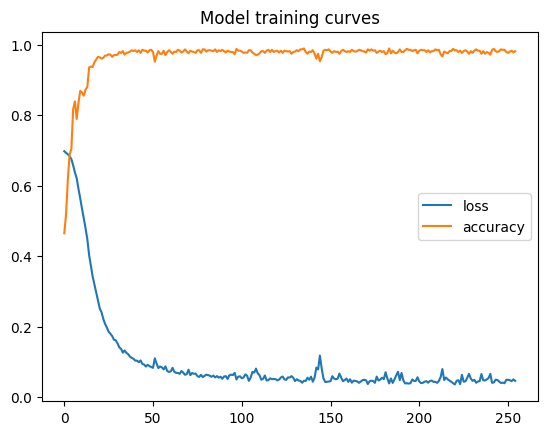

In [9]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model training curves")

Beautiful. this is the ideal plot we'd be looking for when dealing with a classification problem, loss going down and accuracy going up.

Note: For many problems, the loss function going down means the model is improving  (the predictions it's making are getting closer to the ground truth labels).